In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
# 加载数据
import os
import wget 
def read_csv(path, remote=False, refresh=False):
    """读取csv,若是远程文件第一次远程读取，下载在本地，以后直接从本地读取"""
    if not remote:
        return pd.read_csv(path)
    
    out_path = path.split('/')[-1] + '.csv'
    if refresh:
        wget.download(path, out_path)
        return pd.read_csv(out_path)
    else:
        if os.path.exists(out_path):
            return pd.read_csv(out_path)
        else:
            wget.download(path, out_path)
            return pd.read_csv(out_path)                
                

In [3]:
# midwest
mid_df = read_csv('https://query.data.world/s/ohormtabw66yxfxj36lxovda3xbkv4', remote=True)
mid_df.head(5).T

,0,1,2,3,4
PID,561,562,563,564,565
county,ADAMS,ALEXANDER,BOND,BOONE,BROWN
state,IL,IL,IL,IL,IL
area,0.052,0.014,0.022,0.017,0.018
poptotal,66090,10626,14991,30806,5836
popdensity,1270.96,759,681.409,1812.12,324.222
popwhite,63917,7054,14477,29344,5264
popblack,1702,3496,429,127,547
popamerindian,98,19,35,46,14
popasian,249,48,16,150,5


In [4]:
# mpg
mpg_df = read_csv('https://query.data.world/s/rfx2c635vfwr2pchhdqia5srmen7uz', remote=True)
mpg_df.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
# mtcar
mtcars_df = read_csv('https://query.data.world/s/j2vzigjrvu37ry3roj6d7b5jrahcjv', remote=True)
mtcars_df.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [22]:
# iris
iris_df = sns.load_dataset('iris')
iris_df.head(5)

URLError: <urlopen error [Errno 61] Connection refused>

## Correlation

### Scatter plot(散点图)
area, poptotal两个维度的关系。并以颜色标识出category

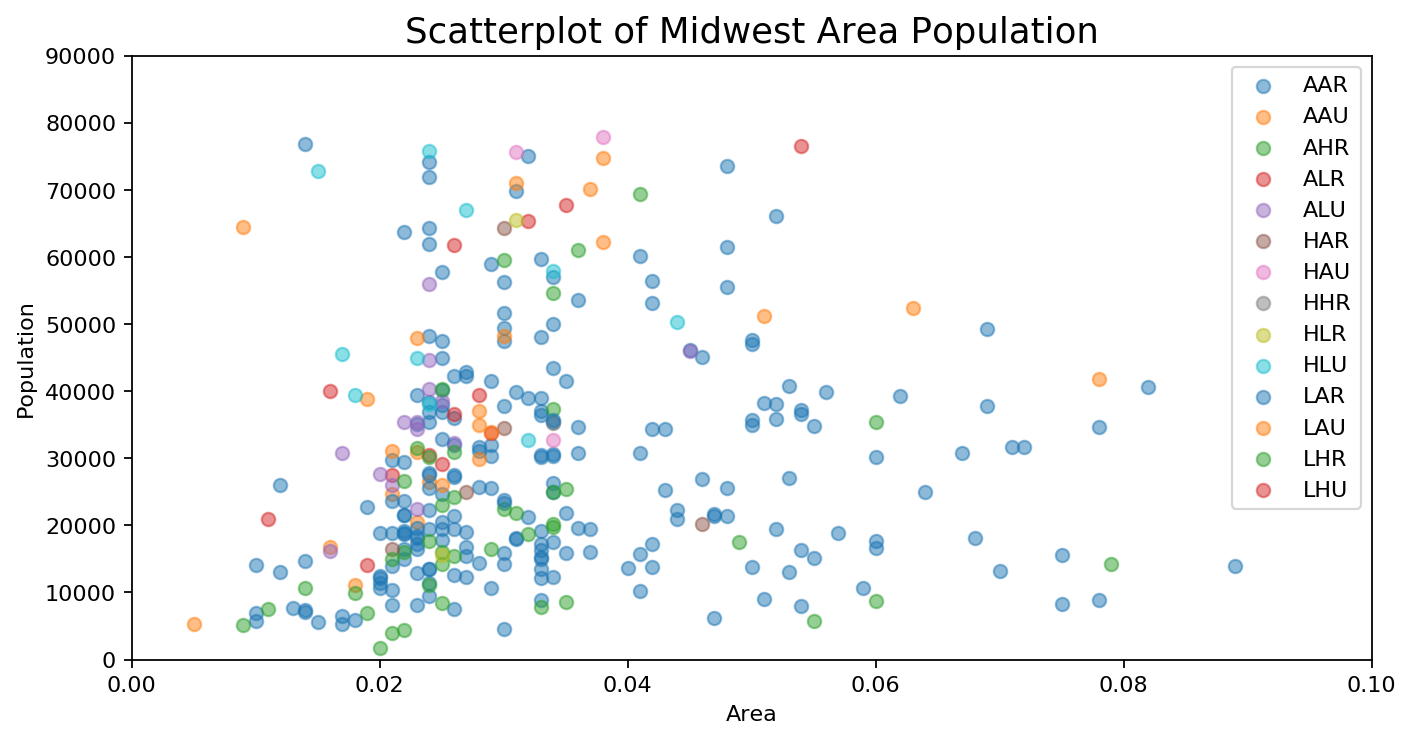

In [6]:
# 获取category的枚举值
category = np.unique(mid_df['category'])
plt.figure(figsize=(10,5), dpi=160, facecolor='w', edgecolor='k')

# 绘制基础图: 不同categroy的area与poptotal两个维度散点图
for item in category:
    tmp_df = mid_df[mid_df['category']==item]
    # 设置：alpha透明度; 
    plt.scatter(x=tmp_df['area'], y=tmp_df['poptotal'], label=item, alpha=0.5)

# 绘制图例和标题
plt.legend(fontsize=10)
plt.title("Scatterplot of Midwest Area Population", fontsize=16)

# x,y轴尺度设置
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set(
    xlim=(0.0, 0.1), ylim=(0, 90000),
    xlabel='Area', ylabel='Population'
)

# 显示
plt.show()


### Bubble plot with Encircling

TODO

### Scatter plot with linear regression line of best fit(线性回归拟合绘制散点图)

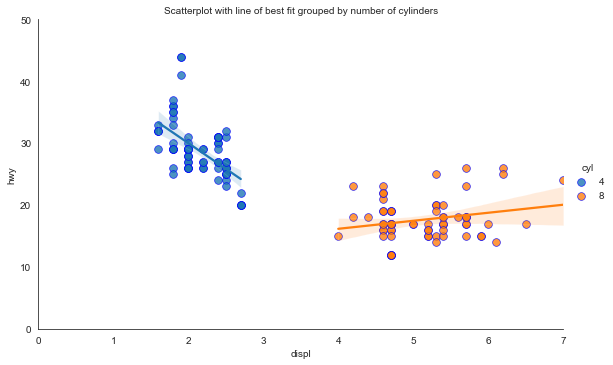

In [7]:
tmp_df = mpg_df[mpg_df['cyl'].isin([4,8])]

# 绘制图形
sns.set_style('white')
# height高度; aspect=width/height. robust=True? scatter_kws对每个圆圈设置?
gridobj = sns.lmplot(x='displ', y='hwy', hue='cyl', data=tmp_df, 
                     height=5, aspect=1.6, palette='tab10',
                    scatter_kws={'s': 60, 'linewidths': 0.7, 'edgecolors': 'b'})

# 形状调整。
gridobj.set(xlim=(0,7), ylim=(0, 50))
plt.title('Scatterplot with line of best fit grouped by number of cylinders', fontsize=10)
plt.show()

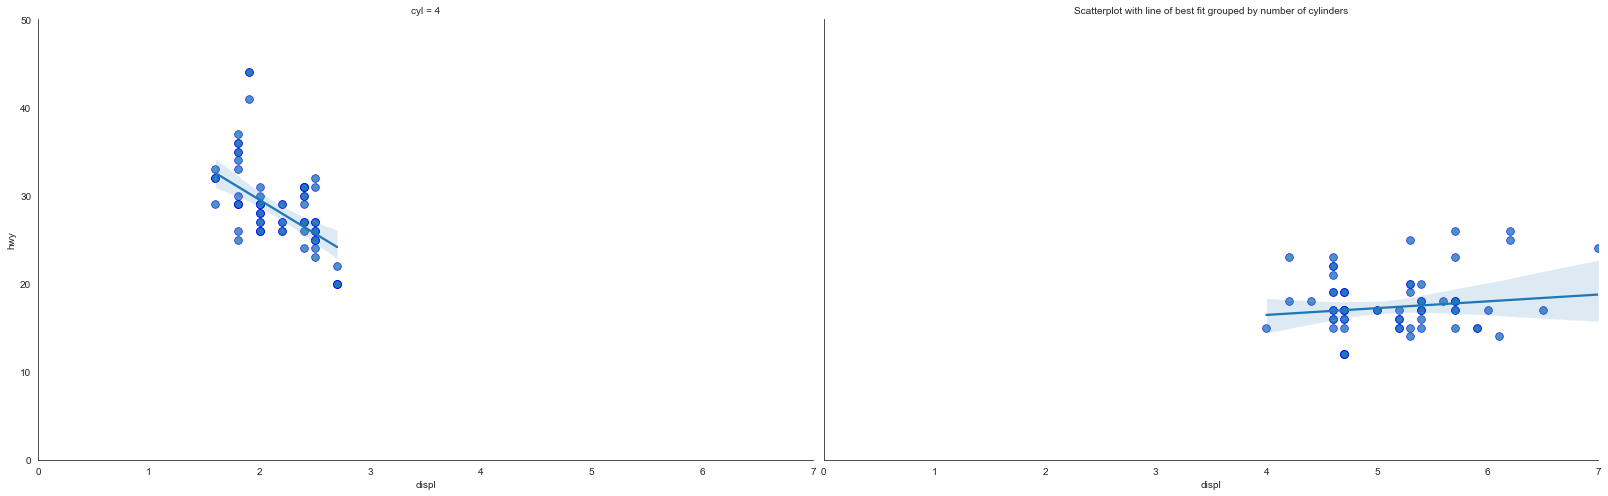

In [8]:
# 按照类别分成两个图形

# height高度; aspect=width/height
gridobj = sns.lmplot(x='displ', y='hwy', col='cyl', data=tmp_df, 
                     height=7, aspect=1.6, palette='tab10', robust=True,
                    scatter_kws={'s': 60, 'linewidths': 0.7, 'edgecolors': 'b'})

# 形状调整。
gridobj.set(xlim=(0,7), ylim=(0, 50))
plt.title('Scatterplot with line of best fit grouped by number of cylinders', fontsize=10)
plt.show()

### jitter with stripplot(抖动图)
如果数据点的坐标值相同(x,y值相同)，多个点绘制会重叠并隐藏。为避免这种情况，可允许数据在一定范围(通过jitter参数控制)内抖动。

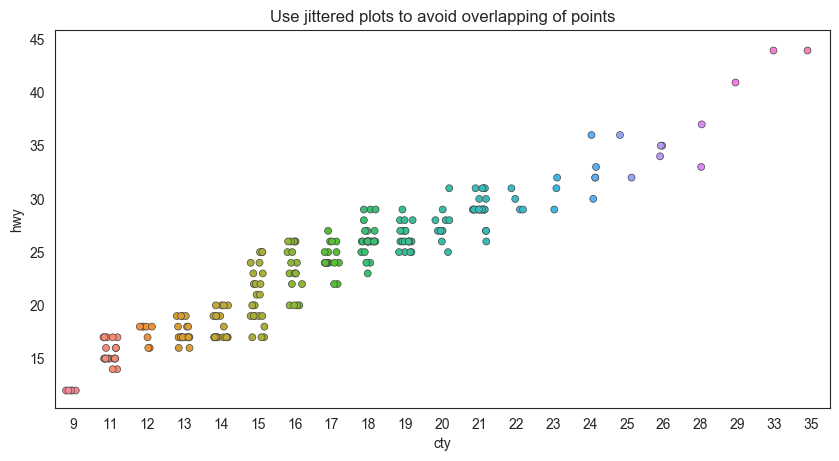

In [9]:
# dpi的意义
plt.subplots(figsize=(10,5), dpi=100)
sns.stripplot(mpg_df['cty'], mpg_df['hwy'], jitter=0.2, linewidth=0.5)

plt.title('Use jittered plots to avoid overlapping of points')
plt.show()

### Counts Plot(计数图)
hwy, cty这两个维度量数量绘制

In [10]:
count_df = mpg_df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

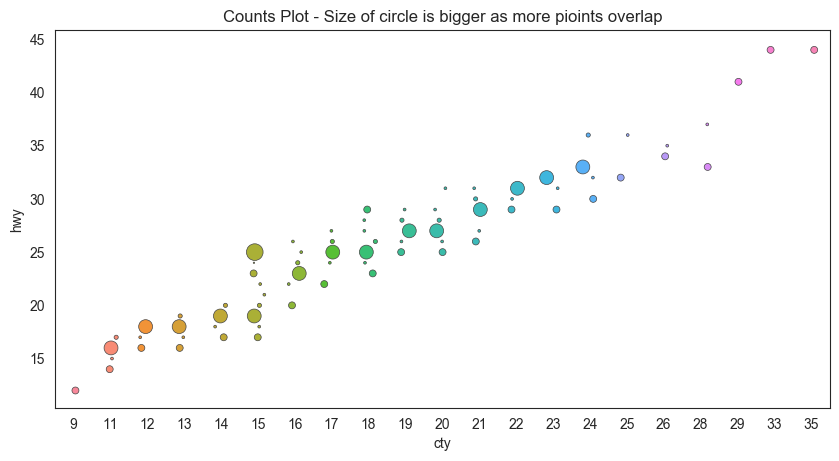

In [11]:
plt.subplots(figsize=(10,5), dpi=100)
sns.stripplot(count_df['cty'], count_df['hwy'], size=count_df['counts'], jitter=0.2, linewidth=0.5)

plt.title('Counts Plot - Size of circle is bigger as more pioints overlap')
plt.show()

### Marginal Histogram 边缘直方图
数据源使用mpg

- 法一: seaborn实现
- 法二: matplotlib实现

#### 基于seaborn实现

#### 基于matplotlib实现

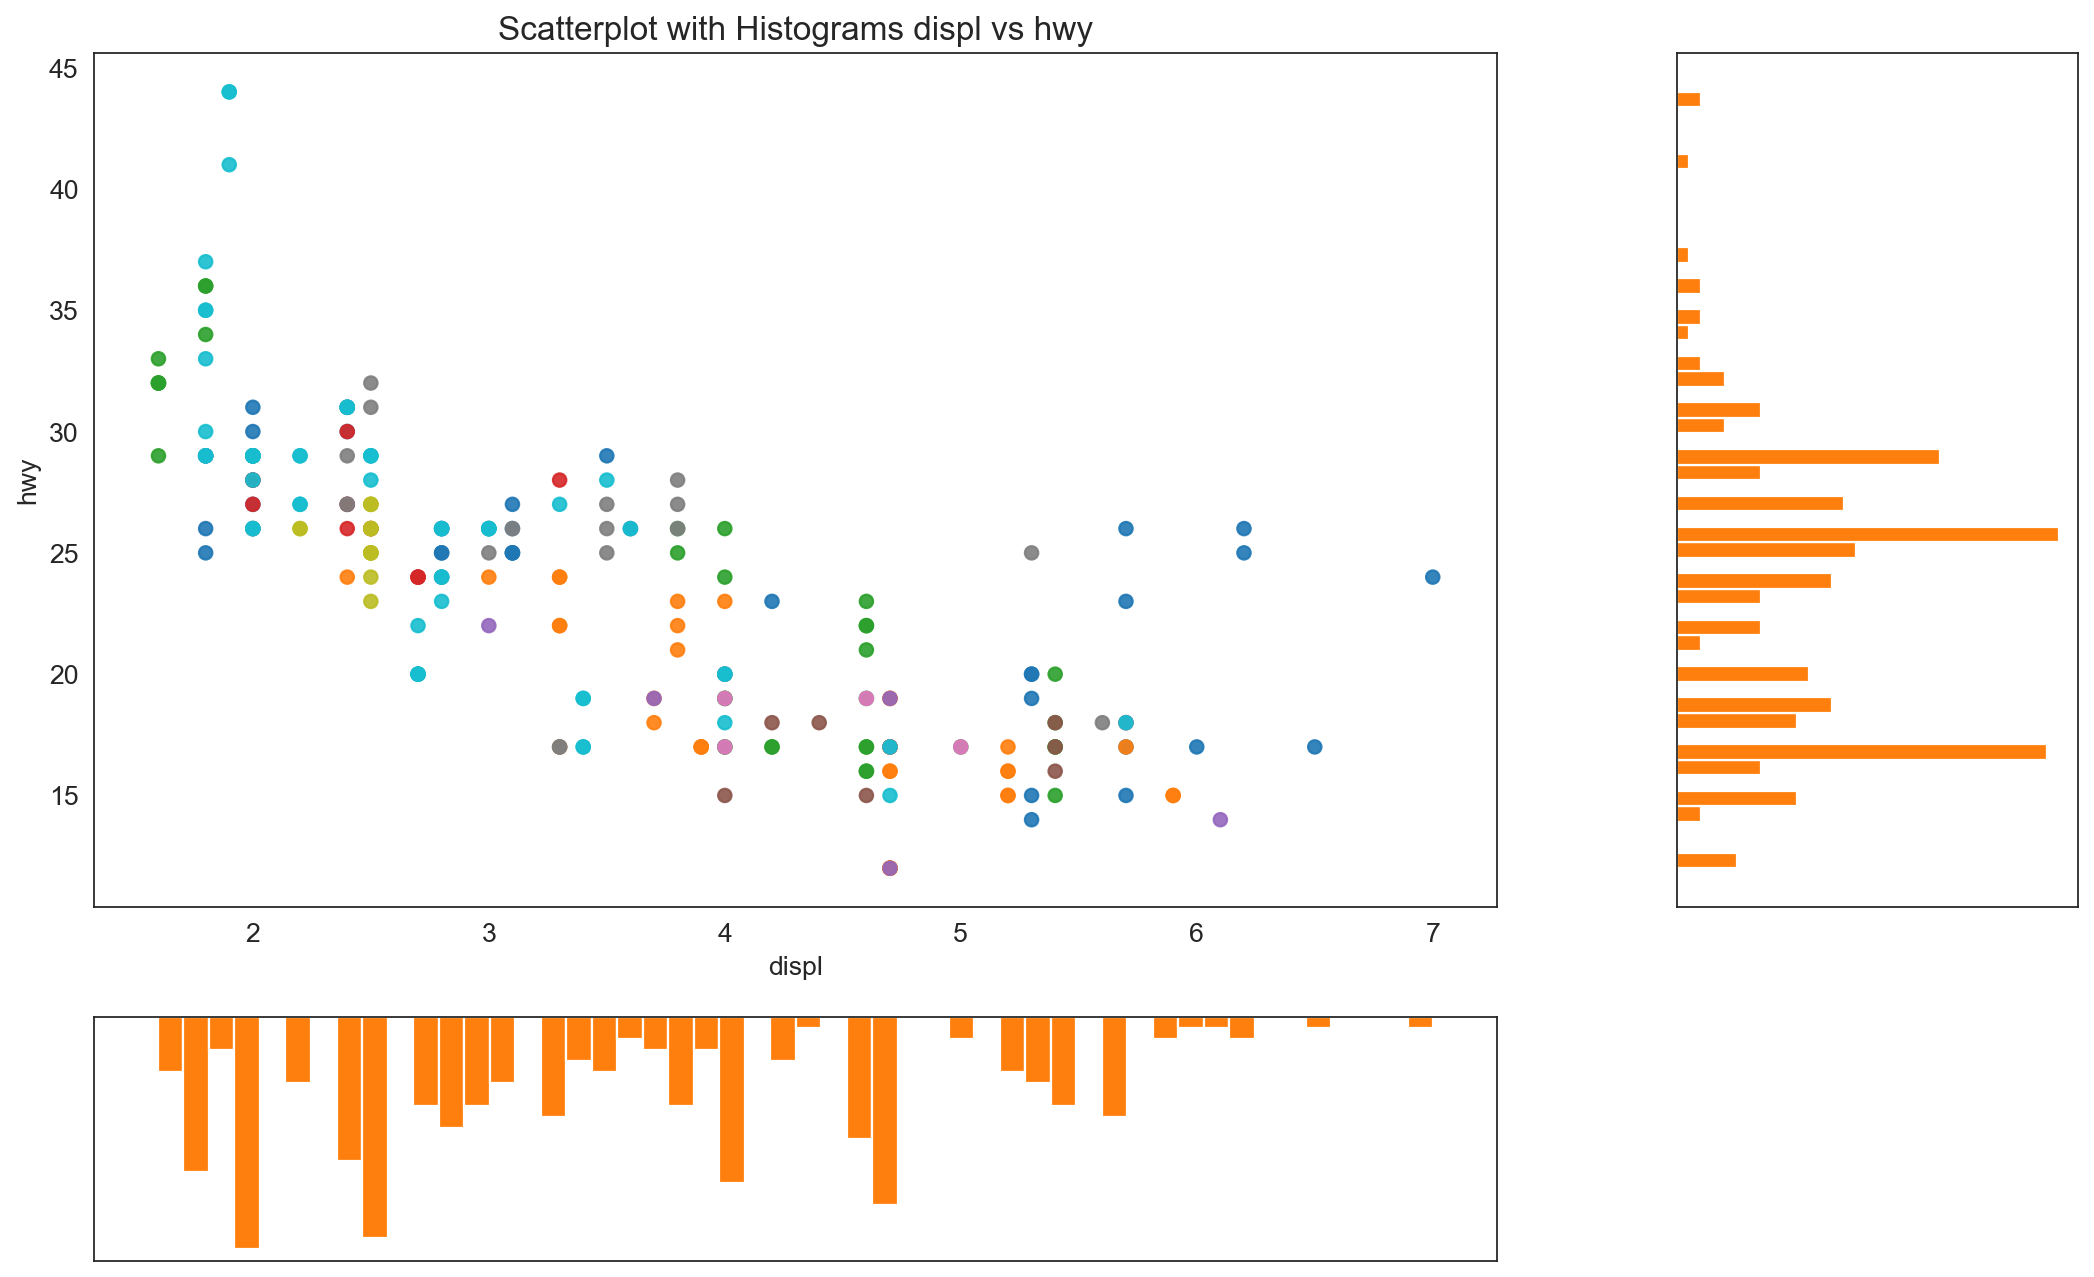

In [12]:
# 1. 使用gridspec做好布局(2*2)
fig = plt.figure(figsize=(16, 10), dpi=160)
# grid = plt.GridSpec(2, 2, left=0.9, right=0.1, top=0.9, bottom=0.1) left, right为什么报错
grid = plt.GridSpec(2, 2, width_ratios=(7, 2), height_ratios=(7, 2))

# axes
ax_main = fig.add_subplot(grid[0, 0])
ax_right = fig.add_subplot(grid[0, 1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[1, 0], xticklabels=[], yticklabels=[])

# 2. Scatterplot on main ax
ax_main.scatter('displ', 'hwy', c=mpg_df['manufacturer'].astype('category').cat.codes, cmap="tab10", data=mpg_df, alpha=0.9)

# 3. histogram on left, right ax. histtype='stepfilled' ?
ax_right.hist('hwy', data=mpg_df, bins=50, orientation='horizontal', color='tab:orange')
ax_bottom.hist('displ', data=mpg_df, bins=50, orientation='vertical', color='tab:orange')
# 翻转y轴
ax_bottom.invert_yaxis()


# 4. 格式微调
ax_main.set(title = 'Scatterplot with Histograms displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(15)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(12)

plt.show()

### Marginal Histogram 边缘箱型图

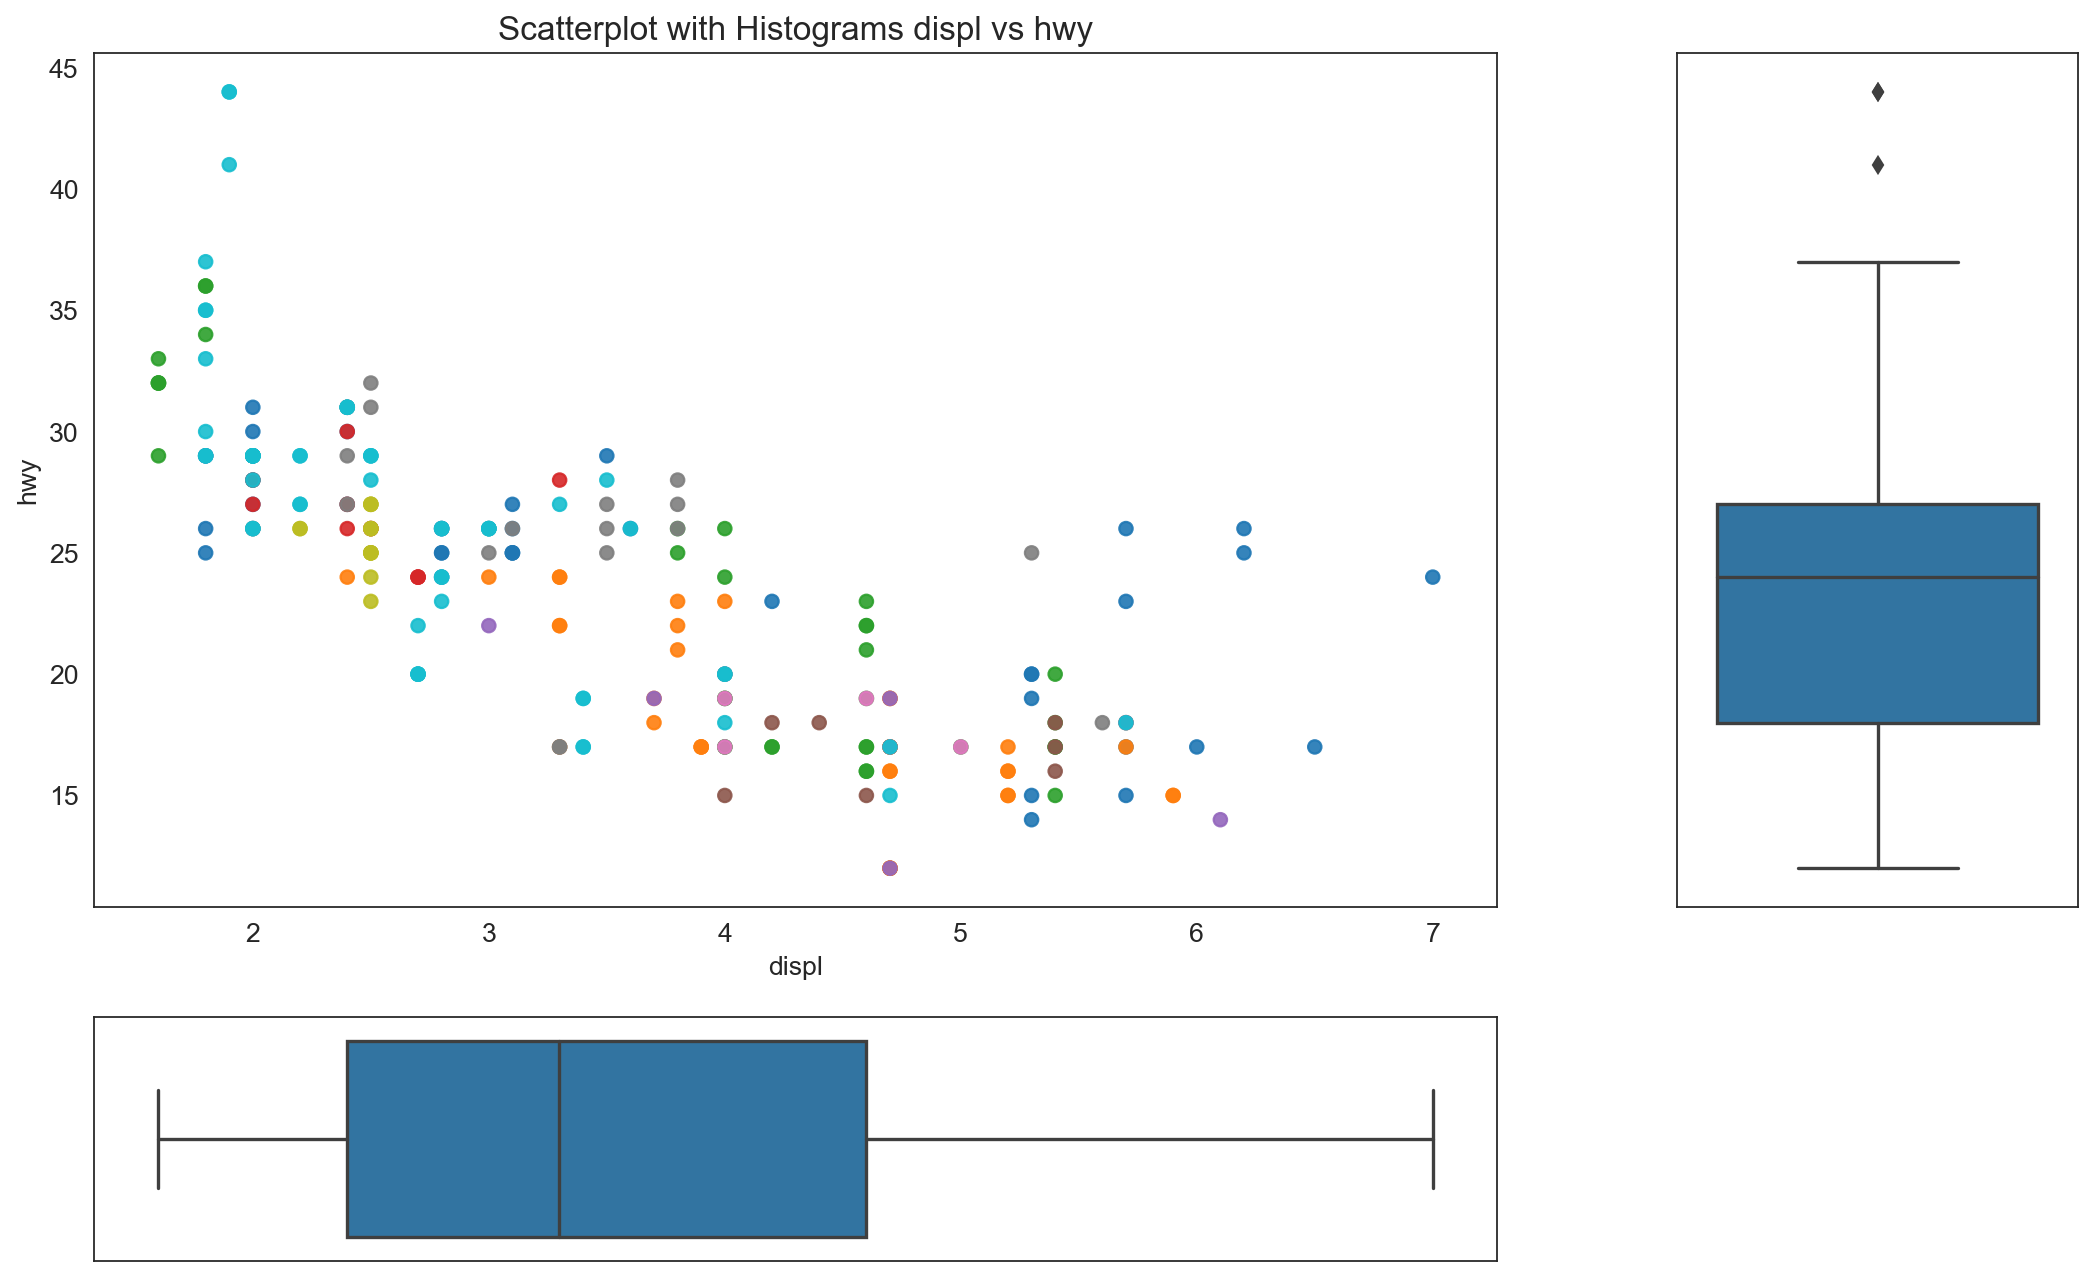

In [13]:
# 1. 使用gridspec做好布局(2*2)
fig = plt.figure(figsize=(16, 10), dpi=160)
grid = plt.GridSpec(2, 2, width_ratios=(7, 2), height_ratios=(7, 2))

# axes。设置刻度尺
ax_main = fig.add_subplot(grid[0, 0])
ax_right = fig.add_subplot(grid[0, 1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[1, 0], xticklabels=[], yticklabels=[])

# 2. Scatterplot on main ax
ax_main.scatter('displ', 'hwy', c=mpg_df['manufacturer'].astype('category').cat.codes, cmap="tab10", data=mpg_df, alpha=0.9)

# 3. histogram on left, right ax. histtype='stepfilled' ?
sns.boxplot('hwy', data=mpg_df, ax=ax_right, orient='v')
sns.boxplot('displ', data=mpg_df, ax=ax_bottom, orient='h')

# 4. 格式微调
ax_main.set(title = 'Scatterplot with Histograms displ vs hwy', xlabel='displ', ylabel='hwy')
# 设置字体
ax_main.title.set_fontsize(15)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(12)
# 删除轴标题
ax_right.set(xlabel='')
ax_right.set(ylabel='')
ax_bottom.set(xlabel='')
ax_bottom.set(ylabel='')


plt.show()

### Correllogram(相关图)
使用mtcars

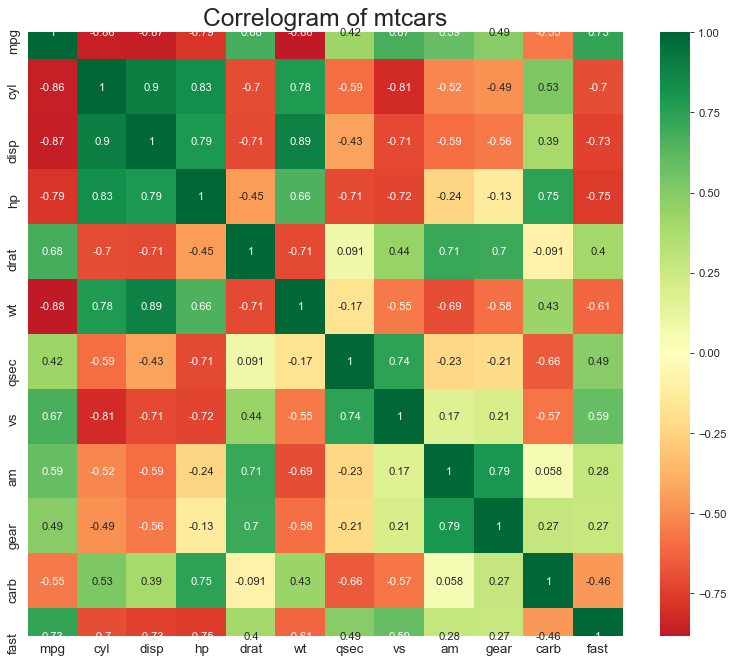

In [18]:
plt.figure(figsize=(12,10), dpi=80)
# 1. 基础图形
sns.heatmap(mtcars_df.corr(), xticklabels=mtcars_df.corr().columns, yticklabels=mtcars_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# 2. 格式微调
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 3. 绘制
plt.show()

### Pairwise Plot